In [1]:
import pandas as pd
import numpy as np
import string
import spacy

import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from wordcloud import wordcloud
%matplotlib inline
import nltk
from nltk.tokenize import word_tokenize

In [2]:
review = pd.read_csv("C:\\Users\\INDIA\\Downloads\\Assignment csv file\\gamestop_product_reviews_dataset_sample.csv")
review

,url,name,brand,sku,reviewer_name,review_title,review_description,recommended_review,verifed_purchaser,helpful_count,not_helpful_count,reviewed_at,images,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,scraped_at
0,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,Leeford,NaN,My new OLED is a upgrade and it's great! This...,yes: I recommend this product,NaN,0,0,10 months ago,NaN,5.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229196240,d749678d-aeba-5a6b-b8e2-8d2121463672,2022-01-16T16:17:56
1,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,DJM7,Great looking screen!,Rating is really a 4.5 but that's unavailable....,yes: I recommend this product,NaN,0,0,10 months ago,NaN,4.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229179703,9f20312c-1047-5824-97d2-d5563b8fd046,2022-01-16T16:17:56
2,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,EC82,Quality,I’m quite pleased with the entire product as a...,yes: I recommend this product,NaN,0,0,10 months ago,NaN,4.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229174444,178b3b03-2c56-5abc-a016-c74c2633c9c2,2022-01-16T16:17:56
3,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,Weeto,Unbelievable picture quality!,I’ve only had my new Visio OLED65 mounted and ...,yes: I recommend this product,NaN,0,0,10 months ago,NaN,2.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229167959,16e925e3-1e59-537e-aa67-1675b613d351,2022-01-16T16:17:56
4,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,LexusSC400,Vizio OLED,The picture is very crisp and the blacks very ...,yes: I recommend this product,NaN,0,0,10 months ago,NaN,5.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229131414,bc017585-3bc1-5a37-9e58-f0bed6de9a72,2022-01-16T16:17:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4681,https://www.gamestop.com/video-games/retro-gam...,Mortal Kombat Vs. DC Universe - PlayStation 3,Midway Games,930223,Ash1986,Great game!,Super fun to play. Exactly what I wanted it to...,yes: I recommend this product,Verified Purchaser,2,0,3 years ago,NaN,5.0,4.1152,217,https://www.gamestop.com/on/demandware.store/S...,123228799,f24f992c-bf96-5d3e-928a-0376616019e4,2022-01-16T16:19:31
4682,https://www.gamestop.com/video-games/xbox-one/...,Forza Horizon 4 - Xbox One,Microsoft,173787,AarontheBarbarian,You Should Race to get This Game,I absolutely love this game. I consider myself...,No: I don’t recommend this product,Verified Purchaser,0,0,2 years ago,NaN,5.0,4.5827,1251,https://www.gamestop.com/on/demandware.store/S...,127817060,1eaba7e7-b082-52ac-9cc8-b8c6bd6f5760,2022-01-16T16:19:31
4683,https://www.gamestop.com/video-games/xbox-one/...,Forza Horizon 4 - Xbox One,Microsoft,173787,Edmo72,First time Forza owner,Love the game. First time owning a Forza game....,No: I don’t recommend this product,Verified Purchaser,0,0,2 years ago,NaN,5.0,4.5827,1251,https://www.gamestop.com/on/demandware.store/S...,127767426,70b90e67-ab5d-50ee-954d-8e6c52daf714,2022-01-16T16:19:31
4684,https://www.gamestop.com/video-games/xbox-one/...,Forza Horizon 4 - Xbox One,Microsoft,173787,m dumb,I give it a 9 out of ten. Best racer out there,Great game but more of the same. Graphics are ...,No: I don’t recommend this product,Verified Purchaser,0,0,2 years ago,NaN,4.0,4.5827,1251,https://www.gamestop.com/on/demandware.store/S...,127688619,80f8f8db-1349-5adc-bbd9-d8ac0422b35a,2022-01-16T16:19:31


In [3]:
reviews = pd.DataFrame()
reviews['x'] = review.review_description 
reviews # the reviews of the product from e-commerce website


,x
0,My new OLED is a upgrade and it's great! This...
1,Rating is really a 4.5 but that's unavailable....
2,I’m quite pleased with the entire product as a...
3,I’ve only had my new Visio OLED65 mounted and ...
4,The picture is very crisp and the blacks very ...
...,...
4681,Super fun to play. Exactly what I wanted it to...
4682,I absolutely love this game. I consider myself...
4683,Love the game. First time owning a Forza game....
4684,Great game but more of the same. Graphics are ...


In [8]:
text = ' '.join(reviews)

# removing punctuation :-


In [9]:
no_punc_text = text.translate(str.maketrans('','',string.punctuation))

In [10]:
no_punc_text.lower()

'my new oled is a upgrade and its great  this is my third vizio tv to replace my first one that went blank after 12 years of stellar service im even thinking of getting it repaired if possible for the great grand kids   i have always liked the picture quality and the price of vizios you cant go wrong rating is really a 45 but thats unavailable the unit looks great both in and off it is short on physical features bluetooth and whatnot but i use both external sound and media units this is a great oled to buy if you want a great tv at a reasonable price i’m quite pleased with the entire product as a whole the quality of picture and sound really speaks for itself when in use i’ve only had my new visio oled65 mounted and operating for 3 days now and i’m like a kid who after christmas can’t get enough of his favorite gift the brightness and clarity of the picture is another huge by step forward in the evolution of  the television i find myself seeking out programming that will showcase the q

# Tokenization :-

In [11]:
text_tokens = word_tokenize(no_punc_text)
text_tokens[0:10]

['My', 'new', 'OLED', 'is', 'a', 'upgrade', 'and', 'its', 'great', 'This']

# Removing Stop-Words :-

In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\INDIA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
my_stop_words = stopwords.words('english')

In [14]:
no_stop_token = [word.lower() for word in text_tokens if not word.lower() in my_stop_words]


In [15]:
no_stop_token[0:10]

['new',
 'oled',
 'upgrade',
 'great',
 'third',
 'vizio',
 'tv',
 'replace',
 'first',
 'one']

In [16]:
from wordcloud import WordCloud , STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off');

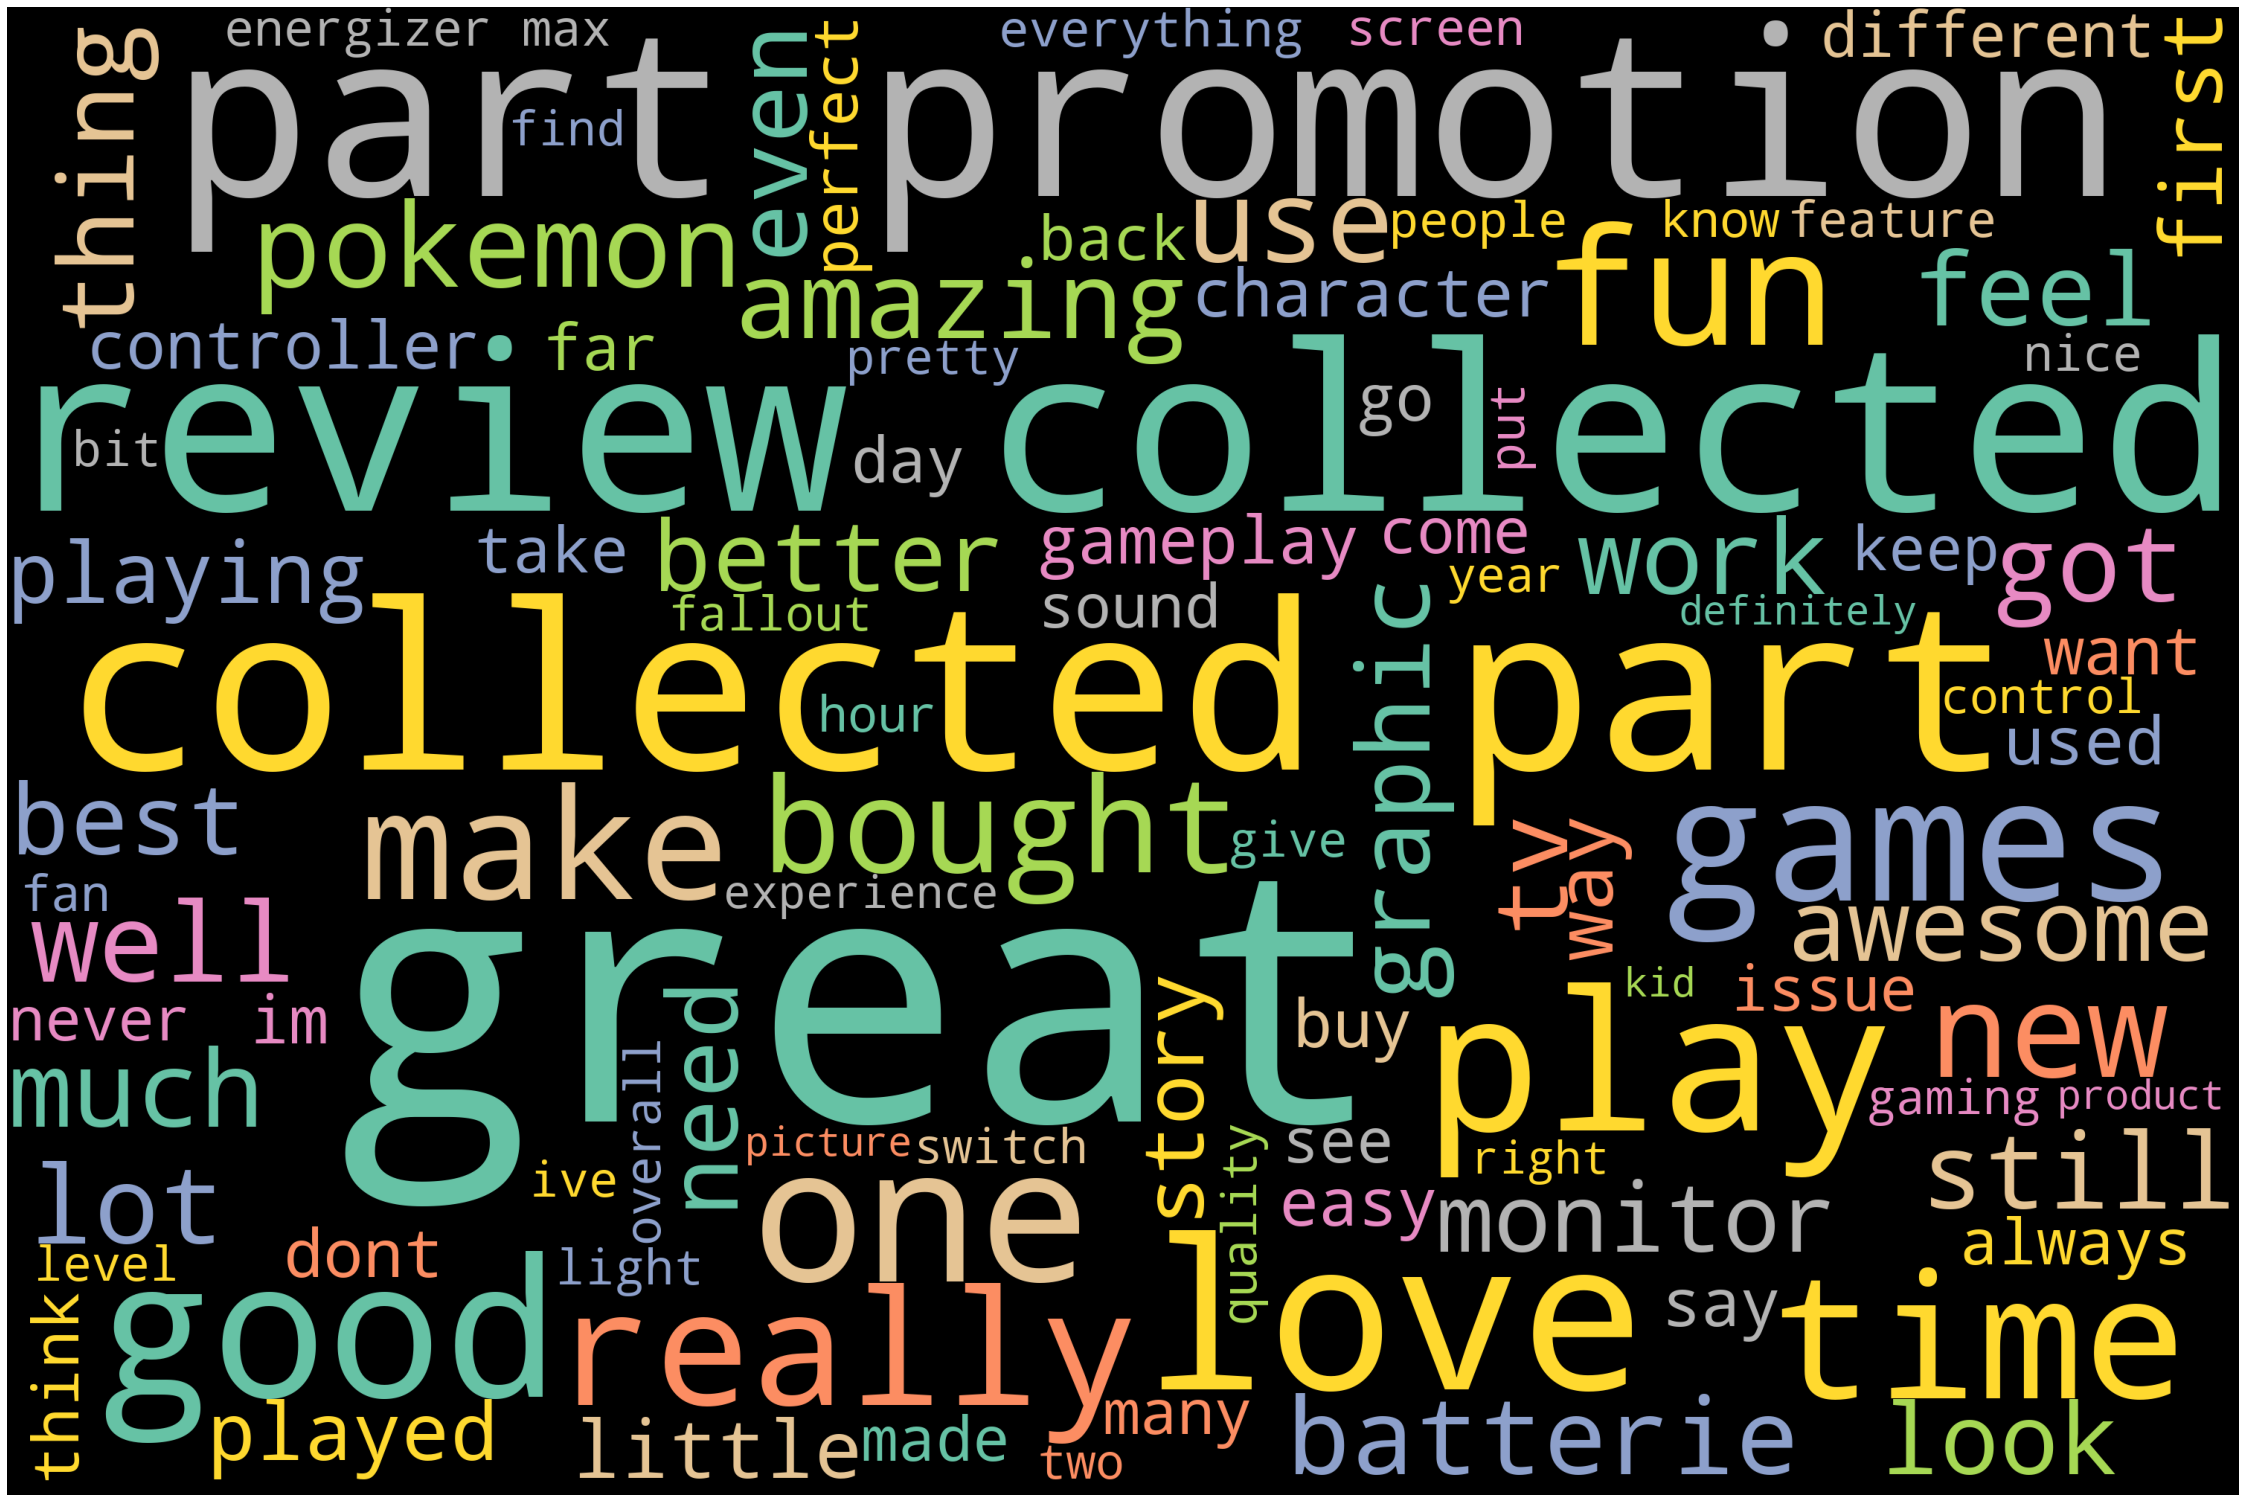

In [17]:
stopwords=STOPWORDS
stopwords.add('game')


wordcloud = WordCloud(width=3000, height=2000,stopwords=stopwords ,background_color='black', max_words=100, colormap='Set2').generate(' '.join(no_stop_token))
plot_cloud(wordcloud)

In [18]:
# above figure shows the most 100 repeated words in reviews.

# Sentimental Analysis :-

In [21]:
afinn = pd.read_csv("C:\\Users\\INDIA\\Downloads\\Assignment csv file\\Afinn.csv",encoding= 'latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [22]:
import nltk
from nltk import tokenize

In [23]:
sentences = tokenize.sent_tokenize(' '.join(reviews))
sentences[0:5]

["My new OLED is a upgrade and it's great!",
 'This is my third Vizio TV to replace my first one that went blank after 12 years of stellar service.',
 "(I'm even thinking of getting it repaired if possible for the great grand kids.)",
 "I have always liked the picture quality and the price of Vizio's.",
 'You cant go wrong.']

In [24]:
sent_df = pd.DataFrame(sentences, columns=['sentences'])
sent_df

,sentences
0,My new OLED is a upgrade and it's great!
1,This is my third Vizio TV to replace my first ...
2,(I'm even thinking of getting it repaired if p...
3,I have always liked the picture quality and th...
4,You cant go wrong.
...,...
15509,The game play is pretty cool.
15510,Great game but more of the same.
15511,Graphics are superb and the racing is as real ...
15512,Great racing game for driving fun!


In [31]:
affinity_score = afinn.set_index('word')['value'].to_dict()

In [32]:
nlp = spacy.load('en_core_web_sm')

In [35]:
def calculate_sentiment(text: str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score += affinity_score.get(word.lemma_,0)
    return sent_score

In [36]:
# example for above :-
# to check it is working or not

calculate_sentiment(text='you are good')

3

In [37]:
sent_df['sentiment_score'] = sent_df['sentences'].apply(calculate_sentiment)

In [38]:
sent_df

,sentences,sentiment_score
0,My new OLED is a upgrade and it's great!,3
1,This is my third Vizio TV to replace my first ...,0
2,(I'm even thinking of getting it repaired if p...,6
3,I have always liked the picture quality and th...,2
4,You cant go wrong.,-2
...,...,...
15509,The game play is pretty cool.,2
15510,Great game but more of the same.,3
15511,Graphics are superb and the racing is as real ...,5
15512,Great racing game for driving fun!,7


In [39]:
sent_df['words'] = sent_df['sentences'].str.split().apply(len)

In [40]:
sent_df['index'] = pd.Series(range(1,15515))
sent_df

,sentences,sentiment_score,words,index
0,My new OLED is a upgrade and it's great!,3,9,1
1,This is my third Vizio TV to replace my first ...,0,20,2
2,(I'm even thinking of getting it repaired if p...,6,14,3
3,I have always liked the picture quality and th...,2,12,4
4,You cant go wrong.,-2,4,5
...,...,...,...,...
15509,The game play is pretty cool.,2,6,15510
15510,Great game but more of the same.,3,7,15511
15511,Graphics are superb and the racing is as real ...,5,12,15512
15512,Great racing game for driving fun!,7,6,15513


In [41]:
# most positive reviews :-

sent_df[sent_df['sentiment_score']>=25]

,sentences,sentiment_score,words,index
2164,Love it great picture and sound looks great in...,25,53,2165
2587,there is so many people that want games like a...,38,164,2588
5895,This game is totally awesome in every way I lo...,25,67,5896
6438,It’s awesome I loved the game I’m pretty anyon...,35,95,6439


In [42]:
# most negative reviews :-

sent_df[sent_df['sentiment_score']<=-10]

,sentences,sentiment_score,words,index
2454,don't buy this game it is so boring bad graphi...,-11,24,2455
5004,The draw backs would be the occasional forced ...,-10,50,5005
5162,"Not much to the game, you can’t get into an on...",-11,34,5163
6315,"The gameplay is just horrible, your punches wi...",-10,62,6316


In [43]:
sent_df['sentiment_score'].describe()

count    15514.000000
mean         1.723218
std          2.938370
min        -11.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         38.000000
Name: sentiment_score, dtype: float64

In [44]:
# AS MEAN IS IN POSITIVE MOST OF THE REVIEW ARE POSITIVE 

# visualization:-

In [45]:
import seaborn as sn

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_score', ylabel='Density'>

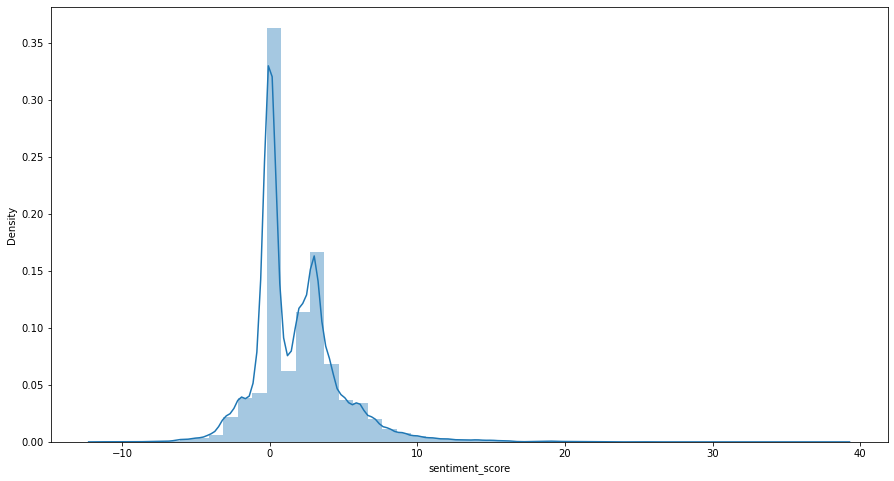

In [46]:
plt.figure(figsize=(15,8))
sn.distplot(sent_df['sentiment_score'])

<AxesSubplot:xlabel='index', ylabel='sentiment_score'>

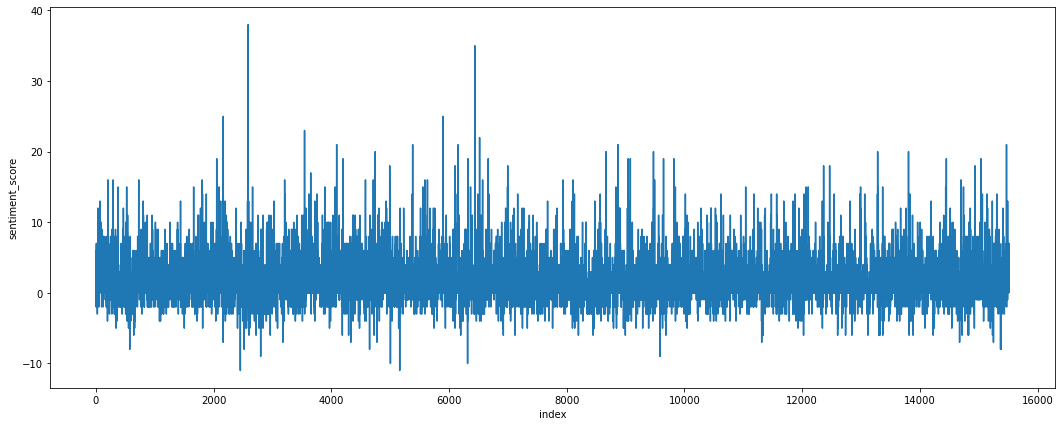

In [47]:
plt.figure(figsize=(18,7))
sn.lineplot(y='sentiment_score', x='index', data=sent_df)

<AxesSubplot:xlabel='words', ylabel='sentiment_score'>

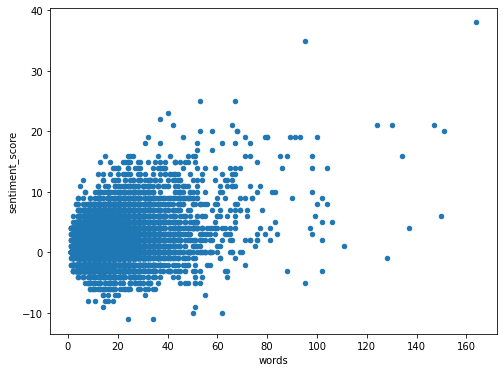

In [48]:
sent_df.plot.scatter(x='words', y='sentiment_score', figsize=(8,6))

In [49]:
# There is any relation betwen the no, of words and sentiment score 